In [48]:
%run ./useful.py
%matplotlib inline

In [49]:
ip_list = ['85','86','87','88','89']
for ssh_ip in ip_list:
    for cmd_ip in ip_list:
        if ssh_ip != cmd_ip:
            ping_cmd = 'nping 128.232.97.'+cmd_ip+' -c 1000 --delay 0.001s'
            ssh = ssh_connect('128.232.97.'+ssh_ip)
            for i in range(10):
                with open('./ping/nping_icmp_'+ssh_ip+'_to_'+cmd_ip+"_"+str(i),'w+') as f:
                    output = ssh_cmd(ping_cmd,ssh)
                    f.write(output)
            ssh.close()

In [50]:
rtts = getrtts_nping("./ping", "nping_icmp", "85", "86")
print(rtts)

[[56.0, 13.0, 13.0], [54.0, 13.0, 13.0], [52.0, 13.0, 13.0], [53.0, 13.0, 13.0], [53.0, 13.0, 13.0], [54.0, 13.0, 13.0], [55.0, 13.0, 13.0], [53.0, 13.0, 13.0], [53.0, 13.0, 13.0], [35.0, 13.0, 13.0]]


In [51]:
avg_mat = np.zeros((len(ip_list),len(ip_list)))
low_mat = np.zeros((len(ip_list),len(ip_list)))
high_mat = np.zeros((len(ip_list),len(ip_list)))

for i in range(len(ip_list)):
    for j in range(len(ip_list)):
        if ip_list[i] != ip_list[j]:
            rtts = getrtts_nping("./ping", "nping_icmp", ip_list[i], ip_list[j])
            low_mat[i][j] = min([i[1] for i in rtts])
            avg_mat[i][j] = np.mean([i[2] for i in rtts])
            high_mat[i][j] = max([i[0] for i in rtts])
        else:
            avg_mat[i][j] = None
            low_mat[i][j] = None
            high_mat[i][j] = None
            

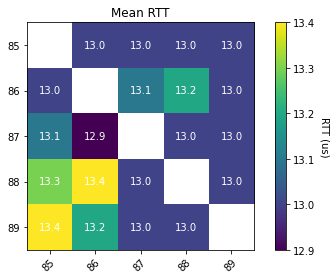

In [52]:
heatmap(avg_mat,ip_list,title="Mean RTT", colbarlab="RTT (us)")

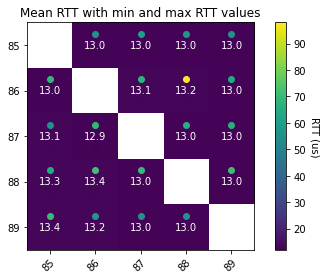

In [53]:
heatmap_conf_int(avg_mat,low_mat,high_mat,ip_list, title="Mean RTT with min and max RTT values", colbarlab="RTT (us)")